In [1]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df1 = pd.read_csv(r'C:\Users\kkr0219\Documents\HCI All Material\Project\COVID-19_Daily_Testing_-_By_Person.csv')
data2 = pd.read_csv(r'C:\Users\kkr0219\Documents\HCI All Material\Project\COVID-19_Daily_Cases__Deaths__and_Hospitalizations.csv')

#Selecting required attributes from second dataset
df2_1 = data2.iloc[:, 22:59]
df2_2 = data2.iloc[:, 2:4]
df2 = pd.concat([df2_2, df2_1], axis=1)

#Combining two datasets
data = pd.concat([df1, df2], axis=1)
data = data.dropna()    #Deleting NaN values

#Dropping irrelevant attributes
data = data.drop(columns=['Day', 'People Not-Positive - Total'])
data = data.drop(data.columns[[39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56]], axis=1)
data = data.sort_values(by=['Date'])
data = data.reset_index(drop=True)
data.head()


,Date,People Tested - Total,People Positive - Total,People Tested - Age 0-17,People Tested - Age 18-29,People Tested - Age 30-39,People Tested - Age 40-49,People Tested - Age 50-59,People Tested - Age 60-69,People Tested - Age 70-79,People Tested - Age 80+,People Tested - Age Unknown,People Tested - Female,People Tested - Male,People Tested - Gender Unknown,People Tested - Latinx,People Tested - Asian Non-Latinx,People Tested - Black Non-Latinx,People Tested - White Non-Latinx,People Tested - Other Race Non-Latinx,People Tested - Unknown Race/Ethnicity,People Positive - Age 0-17,People Positive - Age 18-29,People Positive - Age 30-30,People Positive - Age 40-49,People Positive - Age 50-59,People Positive - Age 60-69,People Positive - Age 70-79,People Positive - Age 80+,People Positive - Age Unknown,People Positive - Female,People Positive - Male,People Positive - Gender Unknown,People Positive - Latinx,People Positive - Asian Non-Latinx,People Positive - Black Non-Latinx,People Positive - White Non-Latinx,People Positive - Other Race Non-Latinx,People Positive - Unknown Race/Ethnicity,Deaths - Total,Hospitalizations - Total,Deaths - Age 0-17,Deaths - Age 18-29,Deaths - Age 30-39,Deaths - Age 40-49,Deaths - Age 50-59,Deaths - Age 60-69,Deaths - Age 70-79,Deaths - Age 80+,Deaths - Age Unknown,Deaths - Female,Deaths - Male,Deaths - Unknown Gender,Deaths - Latinx,Deaths - Asian Non-Latinx,Deaths - Black Non-Latinx,Deaths - White Non-Latinx,Deaths - Other Race Non-Latinx,Deaths - Unknown Race/Ethnicity,Hospitalizations - Age 0-17,Hospitalizations - Age 18-29,Hospitalizations - Age 30-39,Hospitalizations - Age 40-49,Hospitalizations - Age 50-59,Hospitalizations - Age 60-69,Hospitalizations - Age 70-79,Hospitalizations - Age 80+,Hospitalizations - Age Unknown,Hospitalizations - Female,Hospitalizations - Male,Hospitalizations - Unknown Gender,Hospitalizations - Latinx,Hospitalizations - Asian Non-Latinx,Hospitalizations - Black Non-Latinx,Hospitalizations - White Non-Latinx,Hospitalizations - Other Race Non-Latinx,Hospitalizations - Unknown Race/Ethnicity
0,03/01/2020,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1,03/02/2020,9,0,0,1,3,3,1,0,1,0,0,6,3,0,2,1,0,2,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,142.0,0,0,1,1,6,7,10,8,0,15,18,0,8,2,21,2,0,0,2.0,3.0,7.0,16.0,29.0,33.0,32.0,20.0,0.0,58.0,83.0,1.0,37.0,5.0,74.0,16.0,7.0,3.0
2,03/03/2020,33,0,6,5,4,2,6,3,4,3,0,20,13,0,3,3,6,4,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,16.0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,0,0.0,3.0,1.0,2.0,2.0,2.0,3.0,3.0,0.0,11.0,5.0,0.0,8.0,0.0,7.0,1.0,0.0,0.0
3,03/04/2020,43,0,12,7,4,1,11,0,6,2,0,24,19,0,4,3,11,4,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,23.0,0,0,0,1,1,2,2,4,0,4,6,0,3,1,4,2,0,0,0.0,4.0,4.0,2.0,5.0,3.0,2.0,3.0,0.0,7.0,16.0,0.0,12.0,0.0,8.0,3.0,0.0,0.0
4,03/05/2020,17,1,4,2,0,4,3,2,0,2,0,8,9,0,2,0,5,2,1,7,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0


In [2]:
test_tot = data['People Tested - Total'].sum()
pos_tot = data['People Positive - Total'].sum()
death_tot = data['Deaths - Total'].sum()
hosp_tot = data['Hospitalizations - Total'].sum()
print(test_tot, pos_tot, death_tot, hosp_tot)

717480 83205 2929 11792.0


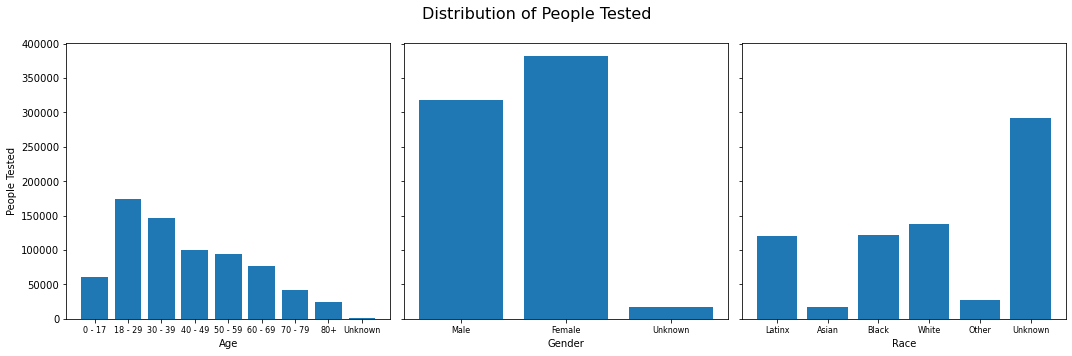

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize=(15,5), sharey=True, squeeze=False)
fig.suptitle("Distribution of People Tested", fontsize=16)

test_age_x = ['0 - 17', '18 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80+', 'Unknown']
test_age_y = [data['People Tested - Age 0-17'].sum(), data['People Tested - Age 18-29'].sum(),
              data['People Tested - Age 30-39'].sum(), data['People Tested - Age 40-49'].sum(),
              data['People Tested - Age 50-59'].sum(), data['People Tested - Age 60-69'].sum(),
              data['People Tested - Age 70-79'].sum(), data['People Tested - Age 80+'].sum(), 
              data['People Tested - Age Unknown'].sum()]

test_gen_x = ['Male', 'Female', 'Unknown']
test_gen_y = [data['People Tested - Male'].sum(), data['People Tested - Female'].sum(),
              data['People Tested - Gender Unknown'].sum()]

test_race_x = ['Latinx', 'Asian', 'Black', 'White', 'Other', 'Unknown']
test_race_y = [data['People Tested - Latinx'].sum(), data['People Tested - Asian Non-Latinx'].sum(),
              data['People Tested - Black Non-Latinx'].sum(), data['People Tested - White Non-Latinx'].sum(),
              data['People Tested - Other Race Non-Latinx'].sum(), data['People Tested - Unknown Race/Ethnicity'].sum()]

ax[0,0].bar(test_age_x, test_age_y)
ax[0,0].set_xlabel('Age')
ax[0,0].set_ylabel('People Tested')
ax[0,0].tick_params(axis='x', which='major', labelsize=8)

ax[0,1].bar(test_gen_x, test_gen_y)
ax[0,1].set_xlabel('Gender')
ax[0,1].tick_params(axis='x', which='major', labelsize=8)

ax[0,2].bar(test_race_x, test_race_y)
ax[0,2].set_xlabel('Race')
ax[0,2].tick_params(axis='x', which='major', labelsize=8)

fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

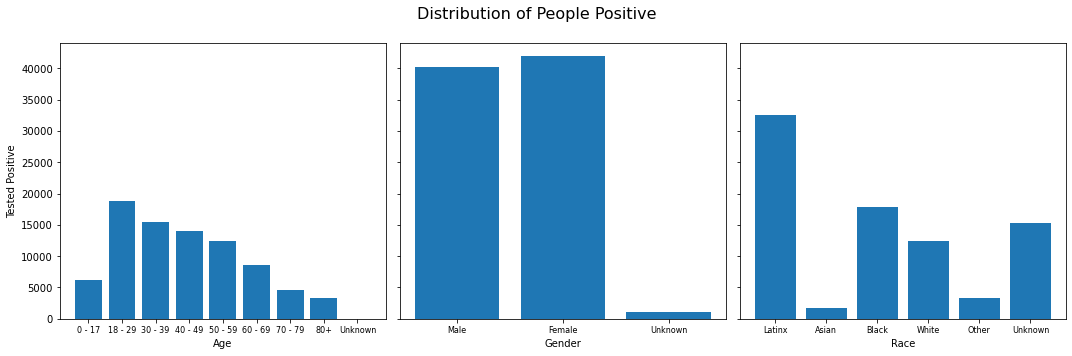

In [4]:
fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize=(15,5), sharey=True, squeeze=False)

fig.suptitle("Distribution of People Positive", fontsize=16)

pos_age_x = ['0 - 17', '18 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80+', 'Unknown']
pos_age_y = [data['People Positive - Age 0-17'].sum(), data['People Positive - Age 18-29'].sum(),
              data['People Positive - Age 30-30'].sum(), data['People Positive - Age 40-49'].sum(),
              data['People Positive - Age 50-59'].sum(), data['People Positive - Age 60-69'].sum(),
              data['People Positive - Age 70-79'].sum(), data['People Positive - Age 80+'].sum(), 
              data['People Positive - Age Unknown'].sum()]

pos_gen_x = ['Male', 'Female', 'Unknown']
pos_gen_y = [data['People Positive - Male'].sum(), data['People Positive - Female'].sum(),
              data['People Positive - Gender Unknown'].sum()]

pos_race_x = ['Latinx', 'Asian', 'Black', 'White', 'Other', 'Unknown']
pos_race_y = [data['People Positive - Latinx'].sum(), data['People Positive - Asian Non-Latinx'].sum(),
              data['People Positive - Black Non-Latinx'].sum(), data['People Positive - White Non-Latinx'].sum(),
              data['People Positive - Other Race Non-Latinx'].sum(), data['People Positive - Unknown Race/Ethnicity'].sum()]

ax[0,0].bar(pos_age_x, pos_age_y)
ax[0,0].set_xlabel('Age')
ax[0,0].set_ylabel('Tested Positive')
ax[0,0].tick_params(axis='x', which='major', labelsize=8)

ax[0,1].bar(pos_gen_x, pos_gen_y)
ax[0,1].set_xlabel('Gender')
ax[0,1].tick_params(axis='x', which='major', labelsize=8)

ax[0,2].bar(pos_race_x, pos_race_y)
ax[0,2].set_xlabel('Race')
ax[0,2].tick_params(axis='x', which='major', labelsize=8)

fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

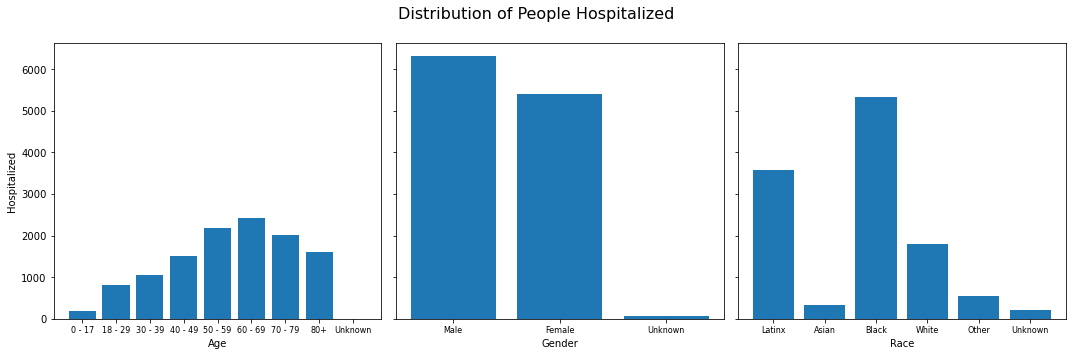

In [5]:
fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize=(15,5), sharey=True, squeeze=False)

fig.suptitle("Distribution of People Hospitalized", fontsize=16)

hosp_age_x = ['0 - 17', '18 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80+', 'Unknown']
hosp_age_y = [data['Hospitalizations - Age 0-17'].sum(), data['Hospitalizations - Age 18-29'].sum(),
              data['Hospitalizations - Age 30-39'].sum(), data['Hospitalizations - Age 40-49'].sum(),
              data['Hospitalizations - Age 50-59'].sum(), data['Hospitalizations - Age 60-69'].sum(),
              data['Hospitalizations - Age 70-79'].sum(), data['Hospitalizations - Age 80+'].sum(), 
              data['Hospitalizations - Age Unknown'].sum()]

hosp_gen_x = ['Male', 'Female', 'Unknown']
hosp_gen_y = [data['Hospitalizations - Male'].sum(), data['Hospitalizations - Female'].sum(),
              data['Hospitalizations - Unknown Gender'].sum()]

hosp_race_x = ['Latinx', 'Asian', 'Black', 'White', 'Other', 'Unknown']
hosp_race_y = [data['Hospitalizations - Latinx'].sum(), data['Hospitalizations - Asian Non-Latinx'].sum(),
              data['Hospitalizations - Black Non-Latinx'].sum(), data['Hospitalizations - White Non-Latinx'].sum(),
              data['Hospitalizations - Other Race Non-Latinx'].sum(), data['Hospitalizations - Unknown Race/Ethnicity'].sum()]

ax[0,0].bar(hosp_age_x, hosp_age_y)
ax[0,0].set_xlabel('Age')
ax[0,0].set_ylabel('Hospitalized')
ax[0,0].tick_params(axis='x', which='major', labelsize=8)

ax[0,1].bar(hosp_gen_x, hosp_gen_y)
ax[0,1].set_xlabel('Gender')
ax[0,1].tick_params(axis='x', which='major', labelsize=8)

ax[0,2].bar(hosp_race_x, hosp_race_y)
ax[0,2].set_xlabel('Race')
ax[0,2].tick_params(axis='x', which='major', labelsize=8)

fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

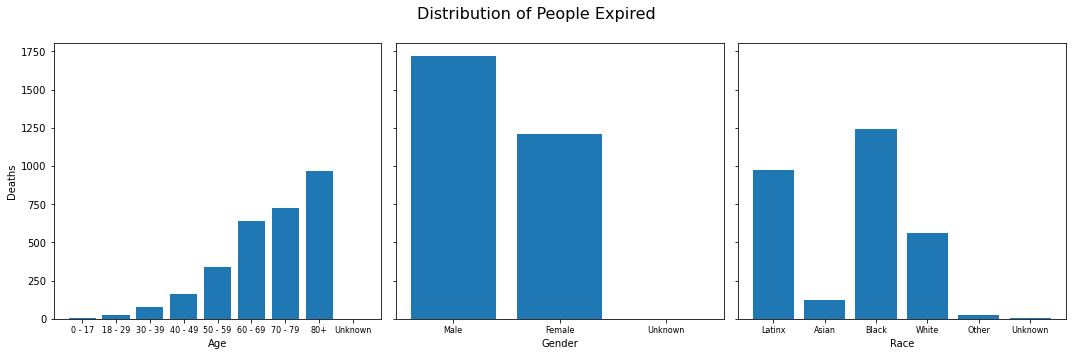

In [6]:
fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize=(15,5), sharey=True, squeeze=False)

fig.suptitle("Distribution of People Expired", fontsize=16)

death_age_x = ['0 - 17', '18 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80+', 'Unknown']
death_age_y = [data['Deaths - Age 0-17'].sum(), data['Deaths - Age 18-29'].sum(),
              data['Deaths - Age 30-39'].sum(), data['Deaths - Age 40-49'].sum(),
              data['Deaths - Age 50-59'].sum(), data['Deaths - Age 60-69'].sum(),
              data['Deaths - Age 70-79'].sum(), data['Deaths - Age 80+'].sum(), 
              data['Deaths - Age Unknown'].sum()]

death_gen_x = ['Male', 'Female', 'Unknown']
death_gen_y = [data['Deaths - Male'].sum(), data['Deaths - Female'].sum(),
              data['Deaths - Unknown Gender'].sum()]

death_race_x = ['Latinx', 'Asian', 'Black', 'White', 'Other', 'Unknown']
death_race_y = [data['Deaths - Latinx'].sum(), data['Deaths - Asian Non-Latinx'].sum(),
              data['Deaths - Black Non-Latinx'].sum(), data['Deaths - White Non-Latinx'].sum(),
              data['Deaths - Other Race Non-Latinx'].sum(), data['Deaths - Unknown Race/Ethnicity'].sum()]

ax[0,0].bar(death_age_x, death_age_y)
ax[0,0].set_xlabel('Age')
ax[0,0].set_ylabel('Deaths')
ax[0,0].tick_params(axis='x', which='major', labelsize=8)

ax[0,1].bar(death_gen_x, death_gen_y)
ax[0,1].set_xlabel('Gender')
ax[0,1].tick_params(axis='x', which='major', labelsize=8)

ax[0,2].bar(death_race_x, death_race_y)
ax[0,2].set_xlabel('Race')
ax[0,2].tick_params(axis='x', which='major', labelsize=8)

fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

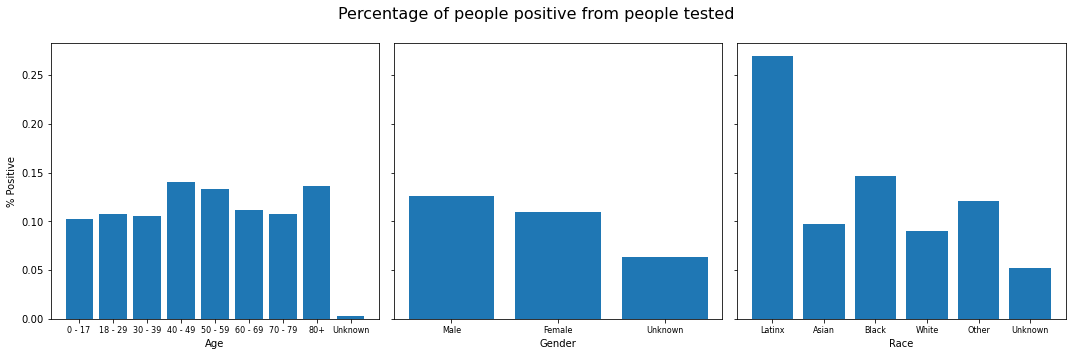

In [7]:
fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize=(15,5), sharey=True, squeeze=False)

fig.suptitle("Percentage of people positive from people tested", fontsize=16)

perpos_age_x = ['0 - 17', '18 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80+', 'Unknown']
perpos_age_y = [data['People Positive - Age 0-17'].sum() / data['People Tested - Age 0-17'].sum(),
                data['People Positive - Age 18-29'].sum() /  data['People Tested - Age 18-29'].sum(),
                data['People Positive - Age 30-30'].sum() / data['People Tested - Age 30-39'].sum(), 
                data['People Positive - Age 40-49'].sum() / data['People Tested - Age 40-49'].sum(),
                data['People Positive - Age 50-59'].sum() / data['People Tested - Age 50-59'].sum(), 
                data['People Positive - Age 60-69'].sum() / data['People Tested - Age 60-69'].sum(),
                data['People Positive - Age 70-79'].sum() / data['People Tested - Age 70-79'].sum(), 
                data['People Positive - Age 80+'].sum() / data['People Tested - Age 80+'].sum(), 
                data['People Positive - Age Unknown'].sum() / data['People Tested - Age Unknown'].sum()]

perpos_gen_x = ['Male', 'Female', 'Unknown']
perpos_gen_y = [data['People Positive - Male'].sum() / data['People Tested - Male'].sum(), 
                data['People Positive - Female'].sum() / data['People Tested - Female'].sum(),
                data['People Positive - Gender Unknown'].sum() / data['People Tested - Gender Unknown'].sum()]

perpos_race_x = ['Latinx', 'Asian', 'Black', 'White', 'Other', 'Unknown']
perpos_race_y = [data['People Positive - Latinx'].sum() / data['People Tested - Latinx'].sum(), 
              data['People Positive - Asian Non-Latinx'].sum() / data['People Tested - Asian Non-Latinx'].sum(),
              data['People Positive - Black Non-Latinx'].sum() / data['People Tested - Black Non-Latinx'].sum(), 
              data['People Positive - White Non-Latinx'].sum() / data['People Tested - White Non-Latinx'].sum(),
              data['People Positive - Other Race Non-Latinx'].sum() / data['People Tested - Other Race Non-Latinx'].sum(), 
              data['People Positive - Unknown Race/Ethnicity'].sum() / data['People Tested - Unknown Race/Ethnicity'].sum()]

ax[0,0].bar(perpos_age_x, perpos_age_y)
ax[0,0].set_xlabel('Age')
ax[0,0].set_ylabel('% Positive')
ax[0,0].tick_params(axis='x', which='major', labelsize=8)

ax[0,1].bar(perpos_gen_x, perpos_gen_y)
ax[0,1].set_xlabel('Gender')
ax[0,1].tick_params(axis='x', which='major', labelsize=8)

ax[0,2].bar(perpos_race_x, perpos_race_y)
ax[0,2].set_xlabel('Race')
ax[0,2].tick_params(axis='x', which='major', labelsize=8)

fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
              

<ipython-input-8-f07f9a5efb1f>:14: RuntimeWarning: invalid value encountered in true_divide
  data['Deaths - Age Unknown'].sum() / data['Hospitalizations - Age Unknown'].sum()]


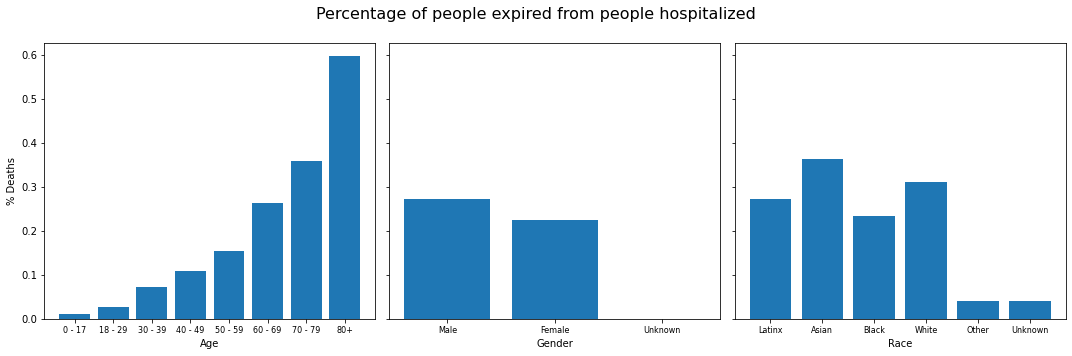

In [8]:
fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize=(15,5), sharey=True, squeeze=False)

fig.suptitle("Percentage of people expired from people hospitalized", fontsize=16)

perdeath_age_x = ['0 - 17', '18 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80+', 'Unknown']
perdeath_age_y = [data['Deaths - Age 0-17'].sum() / data['Hospitalizations - Age 0-17'].sum(), 
                  data['Deaths - Age 18-29'].sum() / data['Hospitalizations - Age 18-29'].sum(),
                  data['Deaths - Age 30-39'].sum() / data['Hospitalizations - Age 30-39'].sum(), 
                  data['Deaths - Age 40-49'].sum() / data['Hospitalizations - Age 40-49'].sum(),
                  data['Deaths - Age 50-59'].sum() / data['Hospitalizations - Age 50-59'].sum(), 
                  data['Deaths - Age 60-69'].sum() / data['Hospitalizations - Age 60-69'].sum(),
                  data['Deaths - Age 70-79'].sum() / data['Hospitalizations - Age 70-79'].sum(), 
                  data['Deaths - Age 80+'].sum() / data['Hospitalizations - Age 80+'].sum(), 
                  data['Deaths - Age Unknown'].sum() / data['Hospitalizations - Age Unknown'].sum()]

perdeath_gen_x = ['Male', 'Female', 'Unknown']
perdeath_gen_y = [data['Deaths - Male'].sum() / data['Hospitalizations - Male'].sum(), 
                  data['Deaths - Female'].sum() / data['Hospitalizations - Female'].sum(),
                  data['Deaths - Unknown Gender'].sum() / data['Hospitalizations - Unknown Gender'].sum()]

perdeath_race_x = ['Latinx', 'Asian', 'Black', 'White', 'Other', 'Unknown']
perdeath_race_y = [data['Deaths - Latinx'].sum() / data['Hospitalizations - Latinx'].sum(), 
                   data['Deaths - Asian Non-Latinx'].sum() / data['Hospitalizations - Asian Non-Latinx'].sum(),
                   data['Deaths - Black Non-Latinx'].sum() / data['Hospitalizations - Black Non-Latinx'].sum(), 
                   data['Deaths - White Non-Latinx'].sum() / data['Hospitalizations - White Non-Latinx'].sum(),
                   data['Deaths - Other Race Non-Latinx'].sum() / data['Hospitalizations - Other Race Non-Latinx'].sum(), 
                   data['Deaths - Unknown Race/Ethnicity'].sum() / data['Hospitalizations - Unknown Race/Ethnicity'].sum()]

ax[0,0].bar(perdeath_age_x, perdeath_age_y)
ax[0,0].set_xlabel('Age')
ax[0,0].set_ylabel('% Deaths')
ax[0,0].tick_params(axis='x', which='major', labelsize=8)

ax[0,1].bar(perdeath_gen_x, perdeath_gen_y)
ax[0,1].set_xlabel('Gender')
ax[0,1].tick_params(axis='x', which='major', labelsize=8)

ax[0,2].bar(perdeath_race_x, perdeath_race_y)
ax[0,2].set_xlabel('Race')
ax[0,2].tick_params(axis='x', which='major', labelsize=8)

fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

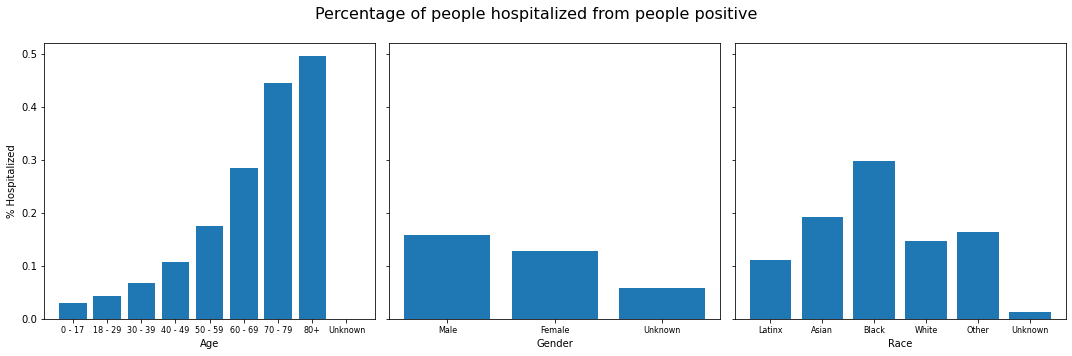

In [9]:
fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize=(15,5), sharey=True, squeeze=False)

fig.suptitle("Percentage of people hospitalized from people positive", fontsize=16)

perhosp_age_x = ['0 - 17', '18 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80+', 'Unknown']
perhosp_age_y = [data['Hospitalizations - Age 0-17'].sum() / data['People Positive - Age 0-17'].sum(), 
                 data['Hospitalizations - Age 18-29'].sum() / data['People Positive - Age 18-29'].sum(),
                 data['Hospitalizations - Age 30-39'].sum() / data['People Positive - Age 30-30'].sum(), 
                 data['Hospitalizations - Age 40-49'].sum() / data['People Positive - Age 40-49'].sum(),
                 data['Hospitalizations - Age 50-59'].sum() / data['People Positive - Age 50-59'].sum(), 
                 data['Hospitalizations - Age 60-69'].sum() / data['People Positive - Age 60-69'].sum(),
                 data['Hospitalizations - Age 70-79'].sum() / data['People Positive - Age 70-79'].sum(), 
                 data['Hospitalizations - Age 80+'].sum() / data['People Positive - Age 80+'].sum(), 
                 data['Hospitalizations - Age Unknown'].sum() / data['People Positive - Age Unknown'].sum()]

perhosp_gen_x = ['Male', 'Female', 'Unknown']
perhosp_gen_y = [data['Hospitalizations - Male'].sum() / data['People Positive - Male'].sum(), 
                 data['Hospitalizations - Female'].sum() / data['People Positive - Female'].sum(),
                 data['Hospitalizations - Unknown Gender'].sum() / data['People Positive - Gender Unknown'].sum()]

perhosp_race_x = ['Latinx', 'Asian', 'Black', 'White', 'Other', 'Unknown']
perhosp_race_y = [data['Hospitalizations - Latinx'].sum() / data['People Positive - Latinx'].sum(), 
                  data['Hospitalizations - Asian Non-Latinx'].sum() / data['People Positive - Asian Non-Latinx'].sum(),
                  data['Hospitalizations - Black Non-Latinx'].sum() / data['People Positive - Black Non-Latinx'].sum(), 
                  data['Hospitalizations - White Non-Latinx'].sum() / data['People Positive - White Non-Latinx'].sum(),
                  data['Hospitalizations - Other Race Non-Latinx'].sum() / data['People Positive - Other Race Non-Latinx'].sum(), 
                  data['Hospitalizations - Unknown Race/Ethnicity'].sum() / data['People Positive - Unknown Race/Ethnicity'].sum()]

ax[0,0].bar(perhosp_age_x, perhosp_age_y)
ax[0,0].set_xlabel('Age')
ax[0,0].set_ylabel('% Hospitalized')
ax[0,0].tick_params(axis='x', which='major', labelsize=8)

ax[0,1].bar(perhosp_gen_x, perhosp_gen_y)
ax[0,1].set_xlabel('Gender')
ax[0,1].tick_params(axis='x', which='major', labelsize=8)

ax[0,2].bar(perhosp_race_x, perhosp_race_y)
ax[0,2].set_xlabel('Race')
ax[0,2].tick_params(axis='x', which='major', labelsize=8)

fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

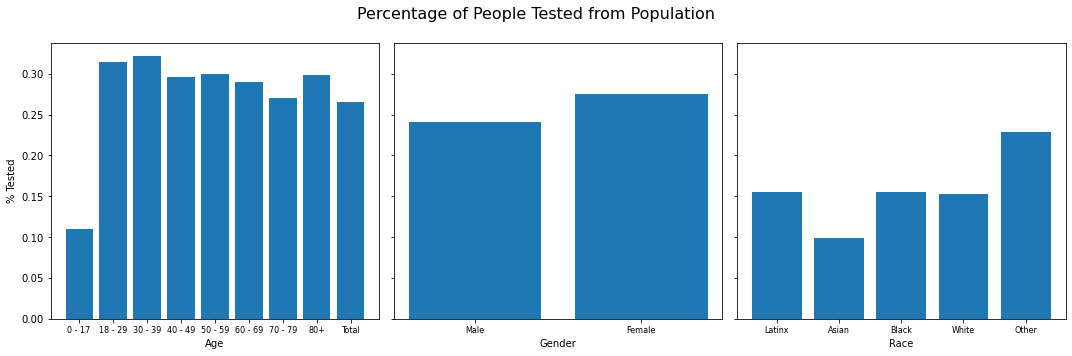

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize=(15,5), sharey=True, squeeze=False)
fig.suptitle("Percentage of People Tested from Population", fontsize=16)

pertest_age_x = ['0 - 17', '18 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80+', 'Total']
pertest_age_y = [data['People Tested - Age 0-17'].sum() / 548999, 
              data['People Tested - Age 18-29'].sum() / 552935,
              data['People Tested - Age 30-39'].sum() / 456321, 
              data['People Tested - Age 40-49'].sum() / 336457,
              data['People Tested - Age 50-59'].sum() / 312965, 
              data['People Tested - Age 60-69'].sum() / 262991,
              data['People Tested - Age 70-79'].sum() / 155334, 
              data['People Tested - Age 80+'].sum() / 79986,
              data['People Tested - Total'].sum() / 2705988]

pertest_gen_x = ['Male', 'Female']
pertest_gen_y = [data['People Tested - Male'].sum() / 1319875, 
              data['People Tested - Female'].sum() / 1386113]

pertest_race_x = ['Latinx', 'Asian', 'Black', 'White', 'Other']
pertest_race_y = [data['People Tested - Latinx'].sum() / 776661, 
               data['People Tested - Asian Non-Latinx'].sum() / 179841,
               data['People Tested - Black Non-Latinx'].sum() / 784266, 
               data['People Tested - White Non-Latinx'].sum() / 899980,
               data['People Tested - Other Race Non-Latinx'].sum() / 119467]

ax[0,0].bar(pertest_age_x, pertest_age_y)
ax[0,0].set_xlabel('Age')
ax[0,0].set_ylabel('% Tested')
ax[0,0].tick_params(axis='x', which='major', labelsize=8)

ax[0,1].bar(pertest_gen_x, pertest_gen_y)
ax[0,1].set_xlabel('Gender')
ax[0,1].tick_params(axis='x', which='major', labelsize=8)

ax[0,2].bar(pertest_race_x, pertest_race_y)
ax[0,2].set_xlabel('Race')
ax[0,2].tick_params(axis='x', which='major', labelsize=8)

fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()